<a href="https://colab.research.google.com/github/ntr262003/IBMSuperstoredataanalysis/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 3.2 MB/s eta 0:00:00


In [ ]:

from textblob import TextBlob
import pandas as pd
from wordcloud import WordCloud
import tweepy
import re
import snscrape.modules.twitter as sntwitter
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
query ="(from:urstrulyMahesh) until:2023-02-06 since:2022-01-01"
tweets=[]
limit=200

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets) ==limit:
    break
  else:
    tweets.append([tweet.content])


ERROR:snscrape.base:Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=%28from%3AurstrulyMahesh%29+until%3A2023-02-06+since%3A2022-01-01&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_c

ScraperException: ignored

In [ ]:
df= pd.DataFrame(tweets,columns=['Tweets'])
df

,Tweets
0,Best of luck on your new one @AshokGalla_!! Wi...
1,The genius who brought together culture &amp; ...
2,Saddened to hear about the demise of #Jamuna g...
3,Congratulations @ssrajamouli sir @mmkeeravaani...
4,"Super proud that the nation's favourite, and n..."
...,...
142,"#PonMalare, the first single from the Malayala..."
143,A song I personally love! Here's #Hrudayama fr...
144,https://t.co/PN7oR9GrUT
145,.@ThisIsDSP what can I say.. you’re a rock sta...


In [ ]:
#Create a function to clean the tweets
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #Removed @mentions
    text=re.sub(r'#','',text) #Removing the '#' symbol
    text=re.sub(r'Rt[\s]+','',text) # Remove the hyper link
    text=re.sub(r'https?:\/\/\S+','',text) #Remove the hyper link
    return text
#Claening the text
df['Tweets']=df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,Best of luck on your new one _!! Wishing you e...
1,The genius who brought together culture &amp; ...
2,Saddened to hear about the demise of Jamuna ga...
3,Congratulations sir garu PremRakshith a...
4,"Super proud that the nation's favourite, and n..."
...,...
142,"PonMalare, the first single from the Malayalam..."
143,A song I personally love! Here's Hrudayama fro...
144,
145,. what can I say.. you’re a rock star!! Congra...


In [ ]:
# to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

# show the new data frame with the new columns
df


,Tweets,Subjectivity,Polarity
0,Best of luck on your new one _!! Wishing you e...,0.376136,0.389205
1,The genius who brought together culture &amp; ...,0.800000,0.412500
2,Saddened to hear about the demise of Jamuna ga...,0.766667,0.400000
3,Congratulations sir garu PremRakshith a...,1.000000,1.000000
4,"Super proud that the nation's favourite, and n...",0.679167,0.627083
...,...,...,...
142,"PonMalare, the first single from the Malayalam...",0.273810,0.080357
143,A song I personally love! Here's Hrudayama fro...,0.600000,0.625000
144,,0.000000,0.000000
145,. what can I say.. you’re a rock star!! Congra...,0.812500,0.500000


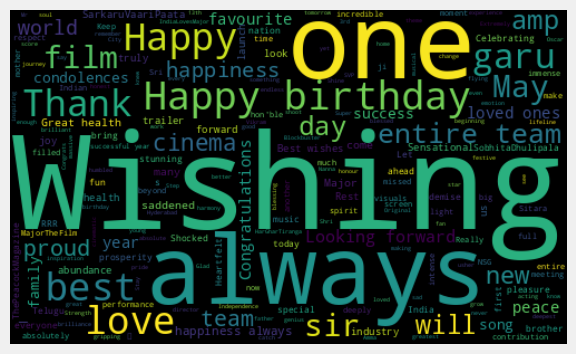

In [ ]:
#plot the word cloud
allWords=''.join([twts for twts in df['Tweets']])
wordCloud= WordCloud(width=500,height=300,random_state =21,max_font_size =119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
#create a function to get negative ,positive ,neutral analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)
#show the data frame

df

,Tweets,Subjectivity,Polarity,Analysis
0,Best of luck on your new one _!! Wishing you e...,0.376136,0.389205,Positive
1,The genius who brought together culture &amp; ...,0.800000,0.412500,Positive
2,Saddened to hear about the demise of Jamuna ga...,0.766667,0.400000,Positive
3,Congratulations sir garu PremRakshith a...,1.000000,1.000000,Positive
4,"Super proud that the nation's favourite, and n...",0.679167,0.627083,Positive
...,...,...,...,...
142,"PonMalare, the first single from the Malayalam...",0.273810,0.080357,Positive
143,A song I personally love! Here's Hrudayama fro...,0.600000,0.625000,Positive
144,,0.000000,0.000000,Neutral
145,. what can I say.. you’re a rock star!! Congra...,0.812500,0.500000,Positive


In [ ]:
#print all the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j=j+1

1)Best of luck on your new one _!! Wishing you endless success always!! 👍👍 

2)The genius who brought together culture &amp; cinema so beautifully... His impact extends far beyond cinema.  Rest in peace KVishwanath garu... You will be deeply missed. My condolences to his family and loved ones. 🙏

3)Saddened to hear about the demise of Jamuna garu. Will fondly remember her for all her iconic roles and her immense contribution to the  industry. My condolences to her family and loved ones 🙏

4)Congratulations  sir  garu      PremRakshith and the brilliant team of RRR! Let's bring the Oscar home!

5)Super proud that the nation's favourite, and now the world's favourite NaatuNaatu is nominated for Best Original Song at the Oscars 👏👏👏

6)Celebrating the spirit of democracy and this great nation of ours... today &amp; everyday. Wishing you all a happy RepublicDay!  🇮🇳

7)Happy birthday NSG! Thank you for putting things in perspective... for lifting me up and for being you always! ❤️❤️❤️ 

8).

In [ ]:
# print the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'], ascending=False)
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j=j+1

1)Shocked to learn that Krishnam Raju garu is no more... A very sad day for me and the entire industry. His life, his work and his immense contribution to cinema will always be remembered. My deepest condolences to Prabhas and the entire family during this difficult time 🙏

2)Shocked and saddened by KK's untimely demise! One of our finest singers... Heartfelt condolences to his family and loved ones. May his soul rest in peace 🙏🙏

3)Shocked and saddened by the demise of NarayanDasNarang garu. A prolific figure in our film industry.. his absence will be deeply felt. A privilege to have known and worked with him. 

4)Shocked and saddened by the news! A very sad day for world cricket! Rest in peace, Rodney Marsh &amp; Shane Warne... you will be terribly missed! Legends



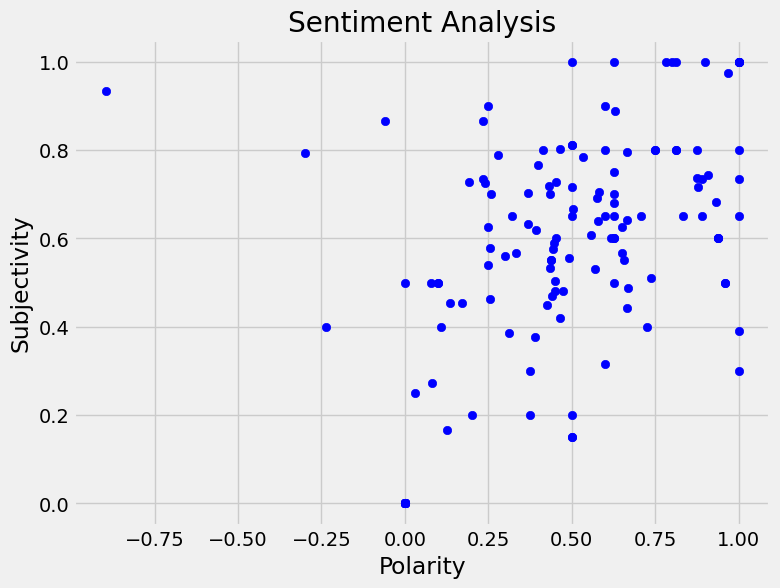

In [ ]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in  range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

82.3

In [ ]:
#get the percentage of negative tweets
ntweets=df[df.Analysis== 'Negative']
ntweets= ntweets['Tweets']

round( (ntweets.shape[0]/df.shape[0]*100), 1 )

2.7

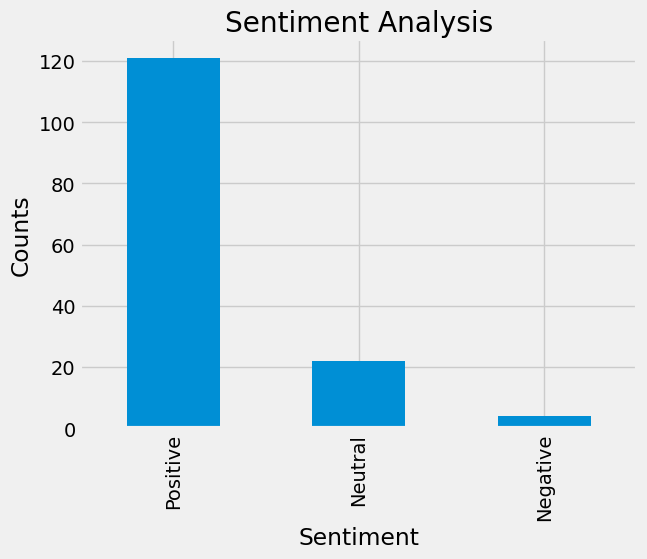

In [ ]:
#show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()